In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns; 
import time

## PCA for visualization

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [7]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print('Original Data Dimensions:', digits.data.shape)
print('Projected Shape:', projected.shape)

Original Data Dimensions: (1797, 64)
Projected Shape: (1797, 2)


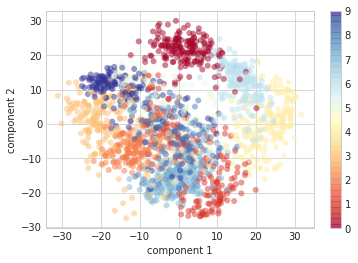

In [8]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('RdYlBu'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## PCA as Noise Filtering

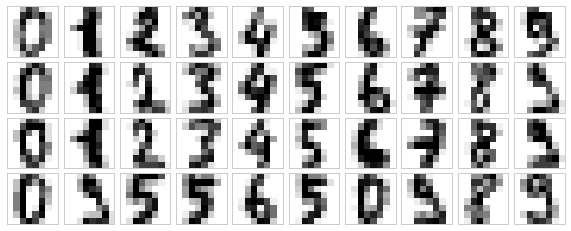

In [9]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

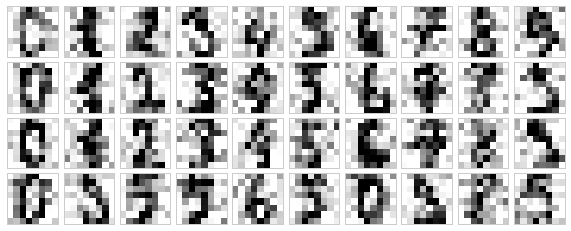

In [10]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [12]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

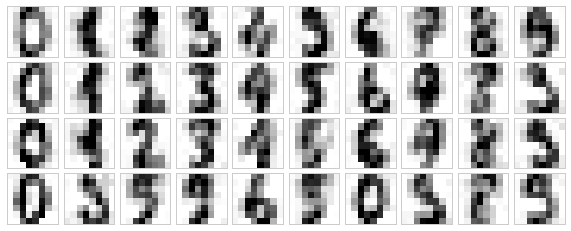

In [13]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [3]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X.data.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
    X, y, test_size=1/7.0, random_state=0)

In [7]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

Initialize a benchmarking data frame:
Let’s initialize a pandas data frame that would hold:

Variance: The variance of the original data that is retained
N_component: number of principal components
Timing: time to fit training
Accuracy: Percentage of records correctly classified.
We will capture the above attributes from each experiment run.

In [8]:
benchmark_cols = ['Variance retained','n_Components','Time(s)','Accuracy_percentage']
benchmark = pd.DataFrame(columns = benchmark_cols)
benchmark

,Variance retained,n_Components,Time(s),Accuracy_percentage


In [9]:
variance = 1.0
n_components = train_img.shape[1]

logisticRegr = LogisticRegression(solver = 'lbfgs')
start = time.time()
logisticRegr.fit(train_img, train_lbl)
end =  time.time()
timing = end-start
# Predict for Multiple Observations (images) at Once
predicted = logisticRegr.predict(test_img)
# generate evaluation metrics
accuracy = (metrics.accuracy_score(test_lbl, predicted))

a = dict(zip(benchmark_cols,[variance,n_components,timing,accuracy]))
benchmark = benchmark.append(a,ignore_index=True)

/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


How long it takes 

In [10]:
timing

25.659125566482544

In [11]:
accuracy

0.9126

In [12]:
variance_list = [0.95,0.90,0.85,0.80,0.75,0.70]

In [13]:
def benchmark_pca(variance,train_img,train_lbl,test_img,test_lbl):
    global benchmark
    print(train_img.shape)
    pca = PCA(variance)
    pca.fit(train_img)
    n_components = pca.n_components_
    train_img = pca.transform(train_img)

    # pca.fit(test_img)
    test_img = pca.transform(test_img)
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    start = time.time()
    logisticRegr.fit(train_img, train_lbl)
    end =  time.time()
 
    timing = end-start   

    # Predict for Multiple Observations (images) at Once
    predicted = logisticRegr.predict(test_img)   

    # generate evaluation metrics
    accuracy = (metrics.accuracy_score(test_lbl, predicted))
    #return 
    a = dict(zip(benchmark_cols,[variance,n_components,timing,accuracy]))
    benchmark = benchmark.append(a,ignore_index=True)

for variance in variance_list:
    benchmark_pca(variance,train_img,train_lbl,test_img,test_lbl)

(60000, 784)


/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(60000, 784)


/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(60000, 784)


/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(60000, 784)


/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(60000, 784)


/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(60000, 784)


/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 1.0, 'variance vs accuracy')

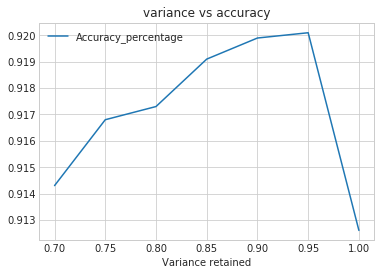

In [14]:
import matplotlib.pyplot as plt
benchmark.plot(x=0,y=-1)
plt.title("variance vs accuracy")

Text(0.5, 1.0, 'no of components vs accuracy')

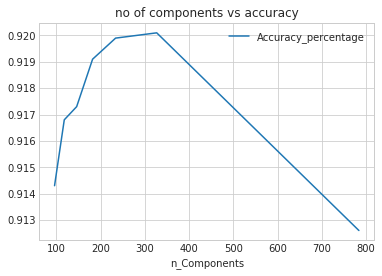

In [15]:
import matplotlib.pyplot as plt
benchmark.plot(x=1,y=-1)
plt.title("no of components vs accuracy")

Text(0.5, 1.0, 'time vs accuracy')

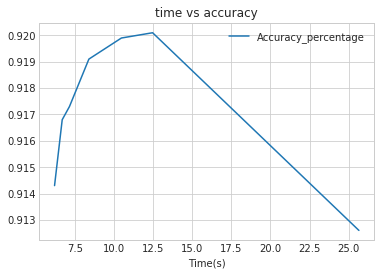

In [16]:
import matplotlib.pyplot as plt
benchmark.plot(x=2,y=-1)
plt.title("time vs accuracy")